In [215]:
import pandas as pd

**This data Analysis is using the below 5 data set of an imaginary hotel chain.
Dim_Date.csv - Have normal data regarding days of 3 months date and days
Dim_Hotels.csv - Details property(hotel) details
Dim_rooms.csv - Types of Room available
fact_booking.csv - Data regarding details all the bookings in all details and room booking**

In [297]:
#importing all the required .csv

df_booking = pd.read_csv("datasets/fact_bookings.csv")
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")


***
### ==> 1. Data Import and Data Exploration
***

In [298]:
#First 5 records of Booking Data frame 

df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [299]:
#printing name of the columns

print(f"Column Names:------> {df_booking.columns}")

Column Names:------> Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')


In [300]:
#printing number of rows & columns

print(f" (Rows, Cols) : {df_booking.shape}")

 (Rows, Cols) : (134590, 12)


In [301]:
#printing Unique Rooms Booking Platform

print(f"Unique Room Categories: ---> {df_booking.room_category.unique()}")
print(f"Unique Booking Platform Categories: ---> {df_booking.booking_platform.unique()}")

Unique Room Categories: ---> ['RT1' 'RT2' 'RT3' 'RT4']
Unique Booking Platform Categories: ---> ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']


**---- Bar Graph on Booking Platform, Rating, Booked room Categories ----**

Count of Bookings per Platform: ---> booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64


<Axes: title={'center': ' Booking Per Platform'}, xlabel='booking_platform'>

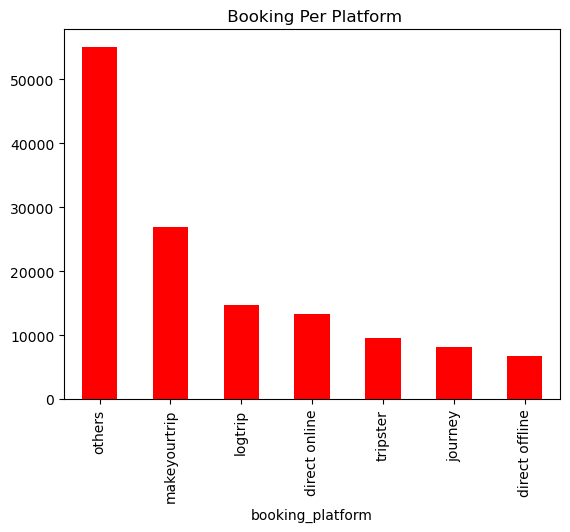

In [302]:
print(f"Count of Bookings per Platform: ---> {df_booking.booking_platform.value_counts()}")
df_booking.booking_platform.value_counts().plot.bar(title = " Booking Per Platform" , color ="red")

Count of Bookings per Platform: ---> ratings_given
5.0    19480
3.0    17561
4.0     9653
2.0     6452
1.0     3537
Name: count, dtype: int64


<Axes: title={'center': 'Rating graph'}, xlabel='ratings_given'>

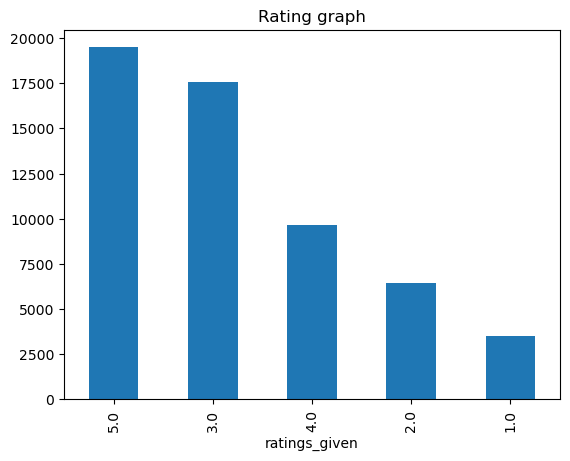

In [303]:
print(f"Count of Bookings per Platform: ---> {df_booking.ratings_given.value_counts()}")
df_booking.ratings_given.value_counts().plot.bar(title = "Rating graph")

Count of Bookings per Platform: ---> room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64


<Axes: title={'center': ' Room Categories Booked overall'}, xlabel='room_category'>

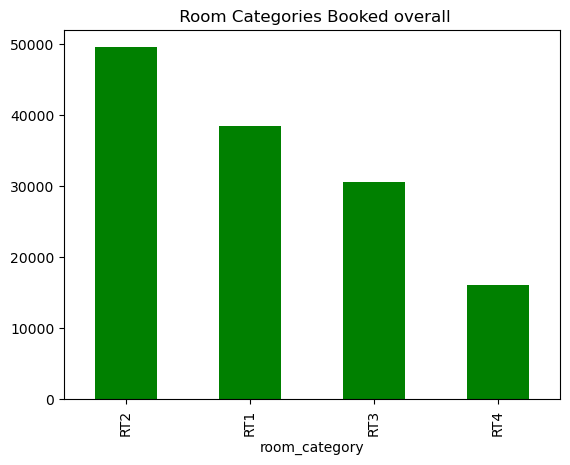

In [304]:
print(f"Count of Bookings per Platform: ---> {df_booking.room_category.value_counts()}")
df_booking.room_category.value_counts().plot.bar(title = " Room Categories Booked overall" , color ="green")

In [305]:
#Calculations on numerical data from the DF

df_booking_describe = df_booking.describe()[['no_guests','ratings_given', 'revenue_generated','revenue_realized']]
df_booking_describe

,no_guests,ratings_given,revenue_generated,revenue_realized
count,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,2.036170,3.619004,1.537805e+04,12696.123256
std,1.034885,1.235009,9.303604e+04,6928.108124
min,-17.000000,1.000000,6.500000e+03,2600.000000
25%,1.000000,3.000000,9.900000e+03,7600.000000
50%,2.000000,4.000000,1.350000e+04,11700.000000
75%,2.000000,5.000000,1.800000e+04,15300.000000
max,6.000000,5.000000,2.856000e+07,45220.000000


In [306]:
##Insights on Categorical/String data from the DF

df_booking.describe(include = 'object')[['booking_date', 'check_in_date','checkout_date', 'room_category', 'booking_platform', 'booking_status']]

,booking_date,check_in_date,checkout_date,room_category,booking_platform,booking_status
count,134590,134590,134590,134590,134590,134590
unique,116,92,97,4,7,3
top,8/6/2022,16-07-22,9/5/2022,RT2,others,Checked Out
freq,1670,2017,1840,49505,55066,94411


**--- The same above required data exploration done to other DataFrames ---**

In [307]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [308]:
print(f"Column Names:------> {df_date.columns}")
print(f" (Rows, Cols) : {df_date.shape}")


Column Names:------> Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')
 (Rows, Cols) : (92, 4)


In [309]:
print(f" Unique Months Data Taken: ---> {df_date["mmm yy"].unique()}")

 Unique Months Data Taken: ---> ['May 22' 'Jun 22' 'Jul 22']


In [310]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [311]:
print(f"Column Names:------> {df_date.columns}")
print(f" (Rows, Cols) : {df_date.shape}")

Column Names:------> Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')
 (Rows, Cols) : (92, 4)


In [312]:
print(f"Unique Property Names: ---> {df_hotels.property_name.unique()}")
print(f"Hotel Categories: ---> {df_hotels.category.unique()}")
print(f"Cities Hotels Present : ---> {df_hotels.city.unique()}")

Unique Property Names: ---> ['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']
Hotel Categories: ---> ['Luxury' 'Business']
Cities Hotels Present : ---> ['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']


In [313]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [314]:
print(f"Column Names:------> {df_rooms.columns}")
print(f" (Rows, Cols) : {df_rooms.shape}")
print(f"Class of Rooms : ---> {df_rooms.room_class.unique()}")

Column Names:------> Index(['room_id', 'room_class'], dtype='object')
 (Rows, Cols) : (4, 2)
Class of Rooms : ---> ['Standard' 'Elite' 'Premium' 'Presidential']


In [315]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [316]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [317]:
print(f"Column Names:------> {df_agg_bookings.columns}")
print(f" (Rows, Cols) : {df_agg_bookings.shape}")

Column Names:------> Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')
 (Rows, Cols) : (9200, 5)


**Unique property ids in aggregate bookings dataset**

In [318]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Total bookings per property_id in aggregate bookings dataset**

In [319]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Days on which bookings are greater than capacity**

In [320]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Properties that have highest capacity**

In [321]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()].property_id.unique()

array([17558])

***
### ==> 2. Data Cleaning
***

In [322]:
#From Data exploration describe() section we could find that some data need to be correct: ---->

df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


From the above we find minimum of guests count is given in negative which is not possible. This need to be corrected. So let's check the data first.

In [323]:
df_booking[df_booking.no_guests <=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


This error needs to be fixed accordingly. But in datafram with more than 135k records only handfull of records have this issue and so these records might be ignored.

In [324]:
#storing the balance data of the DF in the same DF

df_booking = df_booking[df_booking.no_guests >=0]
df_booking.shape

(134578, 12)

In [325]:
#Also while checking revenue_generated column we find the max value as on outlier

df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(6500, 28560000)

Taking 3*Standard_deviation from mean as a outlier logic will clean this

In [326]:
avg, std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()
avg, std

(15378.036937686695, 93040.15493143328)

We can find one standard deviation is 93040.15493143328. So, mean + 3 standard deviation would be around (15378.036937686695+279120.4647942998). So anything more than this can be considered as outlier.

In [327]:
outlier_revenue_generated_limit = avg + 3*std
outlier_revenue_generated_limit

294498.50173198653

In [328]:
df_booking[df_booking.revenue_generated > outlier_revenue_generated_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [329]:
df_booking = df_booking[df_booking.revenue_generated <= outlier_limit]
df_booking.shape

(134573, 12)

In [330]:
#In revenue_realized column too we could maximum value above mean+3*STD

print((f"Mean : {df_booking.revenue_realized.mean()} , STD : {df_booking.revenue_realized.std()}"))
outlier_revenue_realized_limit =(df_booking.revenue_realized.mean())+3*(df_booking.revenue_realized.std())
print(f"Outlier value : {outlier_revenue_realized_limit}")

df_booking[df_booking.revenue_realized > outlier_revenue_realized_limit]

Mean : 12695.983585117372 , STD : 6927.79169224251
Outlier value : 33479.358661844904


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [331]:
#From the above data we can find only room_category RT4 has value above the outlier. 
#To confirm this let's group the data.

print(df_booking[df_booking.revenue_realized > outlier_revenue_realized_limit].groupby("room_category")[[]].value_counts())


room_category
RT4    1299
Name: count, dtype: int64


In [332]:
#From this result we could find all 1299 rows are RT4 rooms.
#Let's check the what kind of room is RT4 in rooms dataframe.

df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [333]:
#From rooms dataframe we are able to understand it's presidential which would be costly, though let's check 3 STD rule
df_booking[df_booking.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [334]:
outlier_revenue_realized_limit = df_booking[df_booking.room_category == "RT4"].revenue_realized.mean()+ 3*df_booking[df_booking.room_category == "RT4"].revenue_realized.std()
outlier_revenue_realized_limit

50585.1056709996

The found outlier is 50585.1056709996 but the maximum value is 45000 in revenue_generated column for "RT4" room category. So this is not need to considered as outlier.

Atlast let's check and possible handle NA values.

In [335]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

No NA handling need to done as it's just rating column. Now Let's check any cleaning data required for df_agg_bookings. First let's check NA values.

In [336]:
df_agg_bookings.shape

(9200, 5)

In [337]:
 df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [338]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [339]:
df_agg_bookings.capacity.fillna(df_agg_bookings[df_agg_bookings.room_category == "RT1"].capacity.median(), inplace=True)

/var/folders/md/3r5147mj0951vm3v86b8vymmjmg0m4/T/ipykernel_9046/2103557143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings[df_agg_bookings.room_category == "RT1"].capacity.median(), inplace=True)


As from the above we could find only two values in Capacity column had NAN value. Both the values were of room_category "RT1". As capacity capacity column has whole number value filled the data with median value. Now let's check for successful_bookings values greater than capcity.

In [340]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [341]:
#We have only 6 rows, which can be ingnored/deleted from 9200 rows. So
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

In [342]:
df_agg_bookings.shape

(9194, 5)

***
### ==> 2. Data Transformation
***

In [343]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


Let's calculate Occupancy percentage for the data. A main concept in hotel business the percentage of ratio fo successfull_bookings to capacity.

In [344]:
df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings*100/df_agg_bookings.capacity
df_agg_bookings["occ_pct"] = round(df_agg_bookings["occ_pct"],2)
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


**What is average occupancy rate in each of the room categories? rate per city? per day type?**

In [345]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.88
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [346]:
df = pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")
df.groupby("room_class")["occ_pct"].mean().round(2).sort_values()

room_class
Standard        57.88
Elite           58.01
Premium         58.03
Presidential    59.28
Name: occ_pct, dtype: float64

In [347]:
df = pd.merge(df,df_hotels,on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard,Atliq City,Business,Mumbai


<Axes: title={'center': 'Average City wise Occupancy Percentage'}, xlabel='city'>

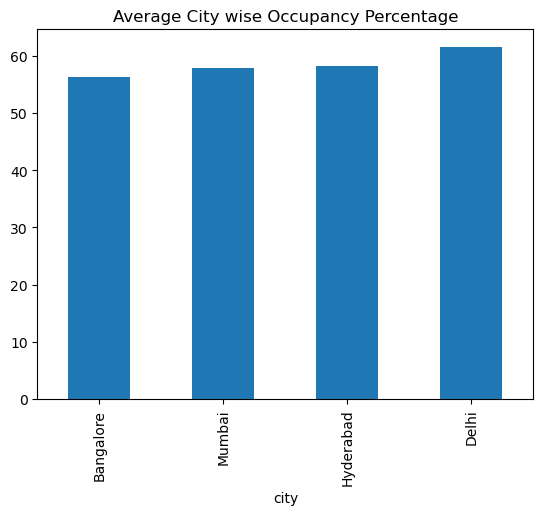

In [348]:
df.groupby("city")["occ_pct"].mean().round(2).sort_values().plot(kind = "bar",title = "Average City wise Occupancy Percentage")

In [349]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on = "date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [355]:
#df.drop(columns = ["date"], inplace=True)

In [356]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,RT1,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday


In [359]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

**Data related to revenue realized & booking platform per cities**

In [360]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [362]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [363]:
df_booking_hotels = pd.merge(df_booking, df_hotels, on = "property_id")
df_booking_hotels.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


<Axes: title={'center': 'Revenue Realized Per city'}, xlabel='city'>

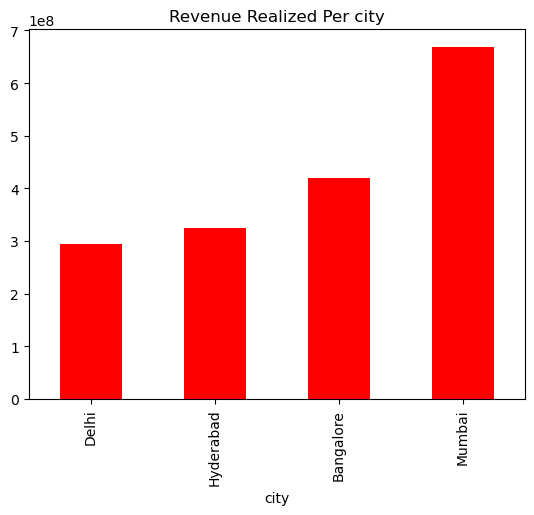

In [368]:
df_booking_hotels.groupby("city")["revenue_realized"].sum().sort_values().plot(kind = "bar", color = "red", title = "Revenue Realized Per city")

city       booking_platform
Bangalore  others              13203
           makeyourtrip         6255
           logtrip              3455
           direct online        3237
           tripster             2306
           journey              1926
           direct offline       1633
Delhi      others               9887
           makeyourtrip         4858
           logtrip              2658
           direct online        2395
           tripster             1765
           journey              1453
           direct offline       1207
Hyderabad  others              14304
           makeyourtrip         7032
           logtrip              3791
           direct online        3421
           tripster             2453
           journey              2109
           direct offline       1773
Mumbai     others              17667
           makeyourtrip         8751
           logtrip              4849
           direct online        4321
           tripster             3106
          

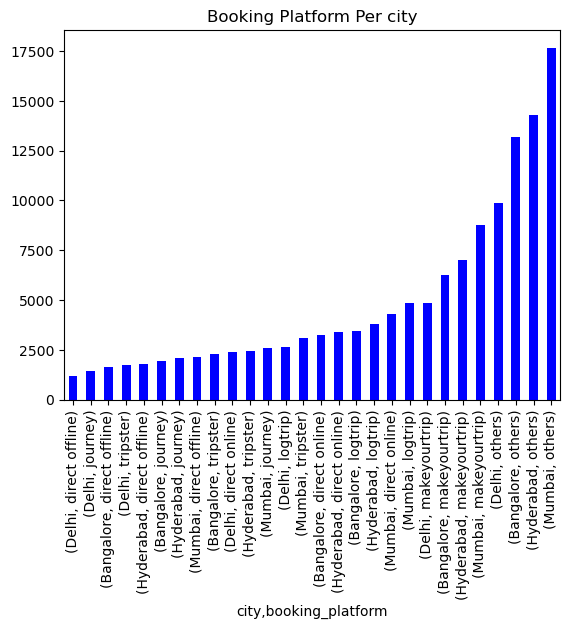

In [376]:
df_booking_hotels.groupby("city")["booking_platform"].value_counts().sort_values().plot(kind = "bar", color = "blue", title = "Booking Platform Per city")
print(df_booking_hotels.groupby("city")["booking_platform"].value_counts())

city
Bangalore    3.407681
Mumbai       3.650545
Hyderabad    3.661041
Delhi        3.779298
Name: ratings_given, dtype: float64


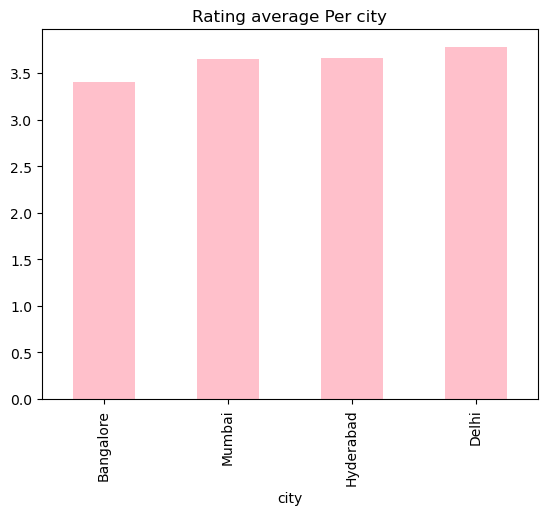

In [373]:
df_booking_hotels.groupby("city")["ratings_given"].mean().sort_values().plot(kind = "bar", color = "pink", title = "Rating average Per city")
print(df_booking_hotels.groupby("city")["ratings_given"].mean().sort_values())

**Revenue Realized Per Month??**

The Month data is present in df_date data frame and revenue_realized in df_bookings, so let's merge them both with check_in_date and date in each Dataframes respectively. As both are totally different let's convert the columns first to same data type that is datetime.

In [382]:
#with info() we can understand both are different data types.
df_booking.info() , df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  

(None, None)

In [389]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [394]:
df_booking["check_in_date"] = pd.to_datetime(df_booking["check_in_date"],dayfirst=True,infer_datetime_format=True, format="mixed")

/var/folders/md/3r5147mj0951vm3v86b8vymmjmg0m4/T/ipykernel_9046/1058814734.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_booking["check_in_date"] = pd.to_datetime(df_booking["check_in_date"],dayfirst=True,infer_datetime_format=True, format="mixed")


In [395]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [399]:
df_revby_month = pd.merge(df_booking, df_date, left_on = "check_in_date", right_on = "date")
df_revby_month.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,2022-05-01,May 22,W 19,weekend


In [401]:
df_revby_month.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

**Print Pie chart of revenue relized per booking Platform**

In [402]:
df_booking_hotels.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [404]:
from matplotlib import pyplot as plt 

In [422]:
rev_per_platf = df_booking_hotels.groupby("booking_platform")["revenue_realized"].sum()
rev_per_platf 

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

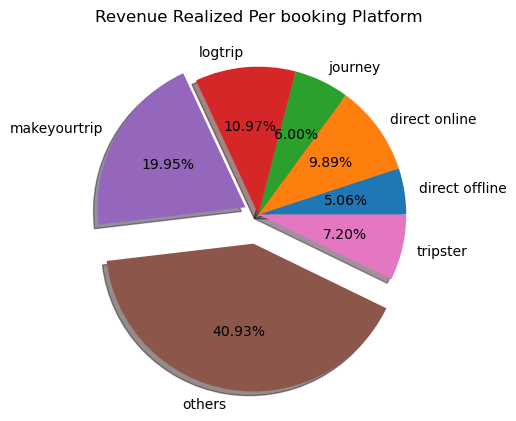

In [432]:
plt.pie(rev_per_platf, labels=rev_per_platf.index, autopct="%1.2f%%", explode = [0,0,0,0,0.1,0.2,0], shadow= True)

plt.title("Revenue Realized Per booking Platform")
plt.show()